# In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data = pd.read_csv('adult.data', header=None)

In [59]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship',
                'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [61]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
data['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [65]:
data['wage_class'] = data['wage_class'].apply(lambda x : 0 if x == ' <=50K' else (1 if x == ' >50K' else 'Something wrong'))

In [66]:
data['wage_class']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

In [67]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [68]:
data['wage_class'].unique()

array([0, 1], dtype=int64)

In [69]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [70]:
data[data['native_country']==' ?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,1
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,0
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,0
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,1


In [71]:
# seems there are lots of '?'

In [72]:
data[data['workclass']==' ?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [73]:
data.shape

(32561, 15)

In [74]:
data[data['occupation']==' ?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [75]:
data[data['occupation']==' ?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [76]:
# droping native country as it has many "?" value and it will be difficult to replace categorical value when new dataset will come 
data.drop(['native_country'], axis=1, inplace=True)

In [77]:
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0


In [78]:
data.shape

(32561, 14)

In [79]:
def find_special_char(dataset):
    char = ' ?'
    no_of_col_contain_char = 0
    catigorical_in = dataset.dtypes[dataset.dtypes=='object'].index
    catigorical = dataset[catigorical_in]
    for i in catigorical.columns:
        val = catigorical[i].unique()
        if char in val:
            print('column {} contain uinque charcter->{} '.format(i, char))
            no_of_col_contain_char +=1
        else:
            pass
    if no_of_col_contain_char == 0:
        print('No column contain uinque charcter "?"')


In [80]:
find_special_char(data)

column workclass contain uinque charcter-> ? 
column occupation contain uinque charcter-> ? 


In [81]:
data[data['workclass'] == ' ?'].shape

(1836, 14)

In [82]:
data[data['occupation'] == ' ?'].shape

(1843, 14)

In [83]:
# data[data['native_country'] == ' ?'].shape

In [84]:
#lest remove these

In [85]:
data = data[data['workclass'] != ' ?']

In [86]:
find_special_char(data)

column occupation contain uinque charcter-> ? 


In [87]:
data[data['occupation'] == ' ?'].shape

(7, 14)

In [88]:
# data[data['native_country'] == ' ?'].shape

In [89]:
# data = data[data['native_country'] != ' ?']

In [90]:
find_special_char(data)

column occupation contain uinque charcter-> ? 


In [91]:
data[data['occupation'] == ' ?'].shape

(7, 14)

In [92]:
data = data[data['occupation'] != ' ?']

In [93]:
find_special_char(data)

No column contain uinque charcter "?"


In [94]:
data.shape

(30718, 14)

In [95]:
categorical_index = data.dtypes[data.dtypes=='object'].index

In [96]:
categorical_index

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')

In [97]:
catigorical_data = data[categorical_index]

In [98]:
catigorical_data.head()

,workclass,education,marital_status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female


In [99]:
def find_unique_value(dataset):
    for i in dataset.columns:
        value = dataset[i].unique()
        lenghth = len(value)
        print('unique value in "{}" column are {} and to total no of unique value are {}'.format(i,value, lenghth))
        print('*'*110)

In [100]:
find_unique_value(catigorical_data)

unique value in "workclass" column are [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay'] and to total no of unique value are 7
**************************************************************************************************************
unique value in "education" column are [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th'] and to total no of unique value are 16
**************************************************************************************************************
unique value in "marital_status" column are [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] and to total no of unique value are 7
**************************************************************************************************************
unique value 

In [101]:
catigorical_data

,workclass,education,marital_status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male


In [102]:
def get_dummy(dataset):
    for i in dataset.columns:
        if dataset[i].dtype == 'object':
            temp_df = pd.get_dummies(dataset[i], columns=[i], prefix=i)
            dataset = dataset.drop([i], axis=1)
            dataset = pd.concat([dataset, temp_df], axis=1)
            del(temp_df)
        else:
            print('not catigorical data')
    return dataset
        
        

In [103]:
catigorical_data = get_dummy(catigorical_data)

In [104]:
catigorical_data

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [105]:
data.drop(categorical_index, axis=1, inplace=True)

In [106]:
data = pd.concat([data, catigorical_data], axis=1)

In [107]:
data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,9,0,0,20,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [108]:
X = data.drop(['wage_class'], axis=1)

In [109]:
X.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occ

In [110]:
y = data['wage_class']

In [111]:
X.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,...,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898455e+05,10.130314,1106.037079,88.910216,40.949313,0.031252,0.068136,0.738850,0.036330,...,0.147308,0.106485,0.046715,0.009311,0.031708,0.094700,0.008073,0.856208,0.323263,0.676737
std,13.118227,1.054583e+05,2.562469,7497.863364,405.657203,11.985382,0.174001,0.251983,0.439269,0.187114,...,0.354418,0.308462,0.211032,0.096042,0.175224,0.292805,0.089490,0.350884,0.467730,0.467730
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
st = StandardScaler()

In [114]:
X = st.fit_transform(X)

In [115]:
X

array([[ 0.04241621, -1.06517328,  1.11990925, ...,  0.4098053 ,
        -0.69114357,  0.69114357],
       [ 0.88095778, -1.01022176,  1.11990925, ...,  0.4098053 ,
        -0.69114357,  0.69114357],
       [-0.03381484,  0.24465473, -0.44111092, ...,  0.4098053 ,
        -0.69114357,  0.69114357],
       ...,
       [ 1.4908062 , -0.35972663, -0.44111092, ...,  0.4098053 ,
         1.44687739, -1.44687739],
       [-1.25351168,  0.11041941, -0.44111092, ...,  0.4098053 ,
        -0.69114357,  0.69114357],
       [ 1.03341989,  0.93006469, -0.44111092, ...,  0.4098053 ,
         1.44687739, -1.44687739]])

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [118]:
from xgboost import XGBClassifier

In [119]:
xgb = XGBClassifier(n_jobs=-1, random_state=101)

In [120]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [121]:
y_pred = xgb.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [123]:
print(accuracy_score(y_test, y_pred))

0.8640407986111112


In [124]:
print(f1_score(y_test, y_pred))

0.7109573241061131


In [125]:
print(confusion_matrix(y_test, y_pred))

[[6422  508]
 [ 745 1541]]


In [126]:
# using gridsearch for hyper parameter tuning


In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
hyper_param = {'booster': ['gbtree', 'gblinear', 'dart'], 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6],
               ' n_estimators': [100,120,150,200]}

In [129]:
grid_search = GridSearchCV(estimator=xgb, param_grid=hyper_param, cv=5, n_jobs=-1, return_train_score=True, verbose=15)

In [130]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  3.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.4min
[Paralle

[17:22:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: {  n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=1, random_state=101,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
      

In [131]:
grid_search.best_score_

0.869174880909253

In [132]:
grid_search.best_params_

{' n_estimators': 100, 'booster': 'gbtree', 'learning_rate': 0.2}

In [133]:
# lets plt cv result
result = pd.DataFrame(grid_search.cv_results_)

In [134]:
result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ n_estimators,param_booster,param_learning_rate,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.057199,0.020088,0.092021,0.003810,100,gbtree,0.1,"{' n_estimators': 100, 'booster': 'gbtree', 'l...",0.867240,0.870728,...,0.868617,0.002749,9,0.886402,0.885995,0.887106,0.887222,0.886350,0.886615,0.000471
1,14.344589,0.652126,0.088837,0.016105,100,gbtree,0.2,"{' n_estimators': 100, 'booster': 'gbtree', 'l...",0.872355,0.867705,...,0.869175,0.003234,1,0.901982,0.899366,0.899779,0.903790,0.900825,0.901149,0.001602
2,13.485108,0.046412,0.085696,0.008042,100,gbtree,0.3,"{' n_estimators': 100, 'booster': 'gbtree', 'l...",0.869100,0.863055,...,0.865966,0.002507,17,0.914191,0.909540,0.912568,0.914138,0.915359,0.913159,0.002015


In [135]:
result.groupby('param_learning_rate')['mean_test_score'].mean()

param_learning_rate
0.1    0.834046
0.2    0.834418
0.3    0.832279
0.4    0.829086
0.5    0.827784
0.6    0.826326
Name: mean_test_score, dtype: float64

In [136]:
result.groupby('param_learning_rate').mean()['mean_train_score']

param_learning_rate
0.1    0.846235
0.2    0.855920
0.3    0.863927
0.4    0.872748
0.5    0.878802
0.6    0.884949
Name: mean_train_score, dtype: float64

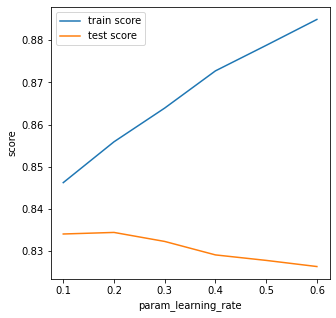

In [137]:
plt.figure(figsize=(5,5))
plt.plot(result.groupby('param_learning_rate').mean()['mean_train_score'], label='train score')
plt.plot(result.groupby('param_learning_rate').mean()['mean_test_score'], label='test score')
plt.xlabel('param_learning_rate')
plt.ylabel('score')
plt.legend()

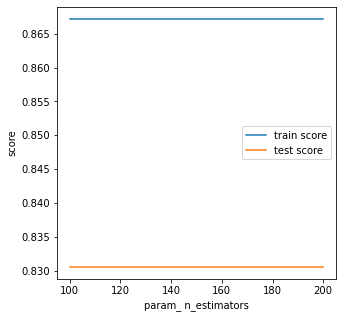

In [139]:
plt.figure(figsize=(5,5))
plt.plot(result.groupby('param_ n_estimators').mean()['mean_train_score'], label='train score')
plt.plot(result.groupby('param_ n_estimators').mean()['mean_test_score'], label='test score')
plt.xlabel('param_ n_estimators')
plt.ylabel('score')
plt.legend()

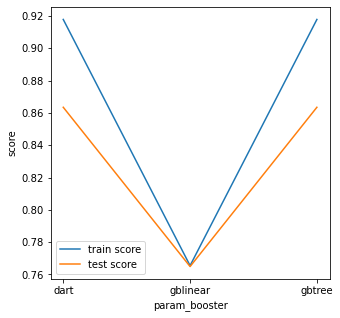

In [140]:
plt.figure(figsize=(5,5))
plt.plot(result.groupby('param_booster').mean()['mean_train_score'], label='train score')
plt.plot(result.groupby('param_booster').mean()['mean_test_score'], label='test score')
plt.xlabel('param_booster')
plt.ylabel('score')
plt.legend()

In [141]:
xgb_final = XGBClassifier(n_estimators=100, booster='gbtree', learning_rate=0.2, n_jobs=-1, random_state=101)

In [142]:
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [143]:
y_pred_final = xgb_final.predict(X_test)

In [144]:
print(accuracy_score(y_test, y_pred))

0.8640407986111112


In [145]:
print(f1_score(y_test, y_pred))

0.7109573241061131


In [146]:
# for other test dataset 

In [148]:
# test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', header=None, error_bad_lines=False)
test_data = pd.read_csv('adult.test', header=None)

In [149]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [150]:
test_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship',
                'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [151]:
test_data.shape

(16281, 15)

In [154]:
test_data['wage_class'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [155]:
test_data.drop(['native_country'], axis=1, inplace=True)

In [156]:
find_special_char(test_data)

column workclass contain uinque charcter-> ? 
column occupation contain uinque charcter-> ? 


In [157]:
test_data = test_data[test_data['workclass'] != ' ?']

In [158]:
find_special_char(test_data)

column occupation contain uinque charcter-> ? 


In [159]:
test_data = test_data[test_data['occupation'] != ' ?']

In [160]:
# test_data = test_data[test_data['native_country'] != ' ?']

In [161]:
find_special_char(test_data)

No column contain uinque charcter "?"


In [162]:
test_data.shape

(15315, 14)

In [163]:
test_data['wage_class'] = test_data['wage_class'].apply(lambda x : 0 if x == ' <=50K.' else (1 if x == ' >50K.' else 'Something wrong'))

In [164]:
test_data['wage_class'].unique()

array([0, 1], dtype=int64)

In [165]:
categorical_index_test_data = test_data.dtypes[test_data.dtypes=='object'].index


In [166]:
catigorical_data_test = test_data[categorical_index_test_data]


In [167]:
catigorical_data_test

,workclass,education,marital_status,occupation,relationship,race,sex
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male
...,...,...,...,...,...,...,...
16275,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male
16276,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female
16278,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male
16279,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male


In [168]:
catigorical_data_test = get_dummy(catigorical_data_test)

In [169]:
catigorical_data_test.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [170]:
# catigorical_data_test.columns

In [171]:
test_data.drop(categorical_index_test_data, axis=1, inplace=True)



In [172]:
test_data = pd.concat([test_data, catigorical_data_test], axis=1)

In [173]:
test_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [174]:
y_test_data = test_data['wage_class']

In [175]:
X_test_data = test_data.drop(['wage_class'], axis=1)

In [176]:
X_test_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [177]:
X_test_data = st.transform(X_test_data)

In [178]:
Y_pred_test = xgb_final.predict(X_test_data)

In [180]:
print("Accuracy on test data is ",accuracy_score(y_test_data, Y_pred_test))

Accuracy on test data is  0.8670584394384591


In [181]:
print("F1 score on test data is ",f1_score(y_test_data, Y_pred_test))

F1 score on test data is  0.7089765580331617


In [182]:
print(confusion_matrix(y_test_data, Y_pred_test))

[[10799   744]
 [ 1292  2480]]
